In [1]:
import pandas as pd

# Replace 'path_to_file' with the actual path to your file
df = pd.read_csv('mini_sample.xls')

df = df[['reviewText', 'overall']]
df['overall'] = df['overall'] - 1  # Adjust labels to start from 0


print(df)

                                             reviewText  overall
0     This is one my must have books. It is a master...      4.0
1     This book provides a reflection that you can a...      4.0
2     I first read THE PROPHET in college back in th...      4.0
3     A timeless classic.  It is a very demanding an...      4.0
4     Reading this made my mind feel like a still po...      4.0
...                                                 ...      ...
1021  To make my point I'll be as concise as possibl...      0.0
1022  This is a book that I can't put down, until 2 ...      3.0
1023  I started this book with the idea that it woul...      3.0
1024  This novel was beautifully written.  Amy Tan o...      3.0
1025  The Professor and the Madman deals with the ro...      3.0

[1026 rows x 2 columns]


In [2]:
df['overall'] = df['overall'].astype(int)
# Using the dtype attribute
overall_dtype = df['overall'].dtype
print("Data type of 'overall' column:", overall_dtype)

Data type of 'overall' column: int64


In [3]:
# Specify the path where you want to save the CSV file
file_path = "MINI_SAMPLE.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

print(f"DataFrame saved to {file_path}")

DataFrame saved to MINI_SAMPLE.csv


In [4]:
!pip install datasets


  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/95/fc/661a7f06e8b7d48fcbd3f55423b7ff1ac3ce59526f146fda87a1e1788ee4/datasets-2.18.0-py3-none-any.whl.metadata
  Using cached datasets-2.18.0-py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for pyarrow>=12.0.0 from https://files.pythonhosted.org/packages/fd/12/e8f27c60e75ddb562b0258db472f3e49253eca2f169fb2665738035566dd/pyarrow-15.0.2-cp38-cp38-manylinux_2_28_x86_64.whl.metadata
  Using cached pyarrow-15.0.2-cp38-cp38-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Obtaining dependency information for pyarrow-hotfix from https://files.pythonhosted.org/packages/e4/f4/9ec2222f5f5f8ea04f66f184caafd991a39c8782e31f5b0266f101cb68ca/pyarrow_hotfix-0.6-py3-none-any.whl.metadata
  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/ad/80/8fc9a4d76b259c901f2c85ed10f330a8fb51993a577bd

In [5]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="MINI_SAMPLE.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 1026
    })
})

In [7]:
from sklearn.model_selection import train_test_split
from datasets import DatasetDict
from datasets import Dataset, DatasetDict


# Assuming 'dataset' is your DatasetDict object containing the training split
train_dataset = dataset['train']

# Split the training dataset into train and test sets
train_data, val_data = train_test_split(train_dataset, test_size=0.2, random_state=42)

# Convert the splits to Dataset objects
train_dataset = Dataset.from_dict(train_data)
val_dataset = Dataset.from_dict(val_data)

# Now you have train_dataset and test_dataset containing the training and test data

# Create a new DatasetDict object to hold the splits
split_dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset})


In [8]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 820
    })
    validation: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 206
    })
})

In [9]:
!pip install transformers[torch]

  Obtaining dependency information for transformers[torch] from https://files.pythonhosted.org/packages/0a/fd/280f4385e76f3c1890efc15fa93f7206134fefad6351397e1bfab6d0d0de/transformers-4.39.1-py3-none-any.whl.metadata
  Using cached transformers-4.39.1-py3-none-any.whl.metadata (134 kB)
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/eb/10/4ccc8eed80f11c082a2883d49d4090aa80c7f65704216a529f490cb089b1/regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/0e/d7/3220a4483d240180d0b9423206cc57a4997fd4b49a8393e5ce9a2f7908a9/tokenizers-0.15.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tokenizers-0.15.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadat

In [10]:
from transformers import AutoTokenizer
# Assuming you have a DatasetDict object named dataset_dict
# and you want to apply the map function to the 'train' dataset


tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["reviewText"], padding="max_length", truncation=True)

# Now you can use the .map() method on the train_dataset
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/820 [00:00<?, ? examples/s]

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

In [11]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['reviewText', 'overall', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 820
    })
    validation: Dataset({
        features: ['reviewText', 'overall', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 206
    })
})

In [12]:
#ADDING EXTRA
tokenized_datasets = tokenized_datasets.remove_columns(["reviewText"])
tokenized_datasets = tokenized_datasets.rename_column("overall", "labels")

In [13]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 820
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 206
    })
})

In [14]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer)

In [15]:
#from transformers import AutoModelForSequenceClassification

#model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased", num_labels=5)

In [16]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-cased", num_labels=5)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from transformers import TrainingArguments

training_args = TrainingArguments(
"test-trainer",
per_device_train_batch_size=16,
per_device_eval_batch_size=16,
num_train_epochs=5,
learning_rate=2e-5,
weight_decay=0.01,
evaluation_strategy="epoch"
)


In [18]:
!pip install evaluate
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Obtaining dependency information for evaluate from https://files.pythonhosted.org/packages/70/63/7644a1eb7b0297e585a6adec98ed9e575309bb973c33b394dae66bc35c69/evaluate-0.4.1-py3-none-any.whl.metadata
  Using cached evaluate-0.4.1-py3-none-any.whl.metadata (9.4 kB)
  Obtaining dependency information for responses<0.19 from https://files.pythonhosted.org/packages/79/f3/2b3a6dc5986303b3dd1bbbcf482022acb2583c428cd23f0b6d37b1a1a519/responses-0.18.0-py3-none-any.whl.metadata
  Using cached responses-0.18.0-py3-none-any.whl.metadata (29 kB)
Using cached evaluate-0.4.1-py3-none-any.whl (84 kB)
Using cached responses-0.18.0-py3-none-any.whl (38 kB)


In [19]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [20]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
)

/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
Detected kernel version 4.14.336, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.003049,0.645631
2,No log,0.746658,0.699029
3,No log,0.768016,0.708738
4,No log,0.757380,0.713592
5,No log,0.755050,0.713592


TrainOutput(global_step=260, training_loss=0.6978722205528847, metrics={'train_runtime': 359.9395, 'train_samples_per_second': 11.391, 'train_steps_per_second': 0.722, 'total_flos': 1078784384102400.0, 'train_loss': 0.6978722205528847, 'epoch': 5.0})

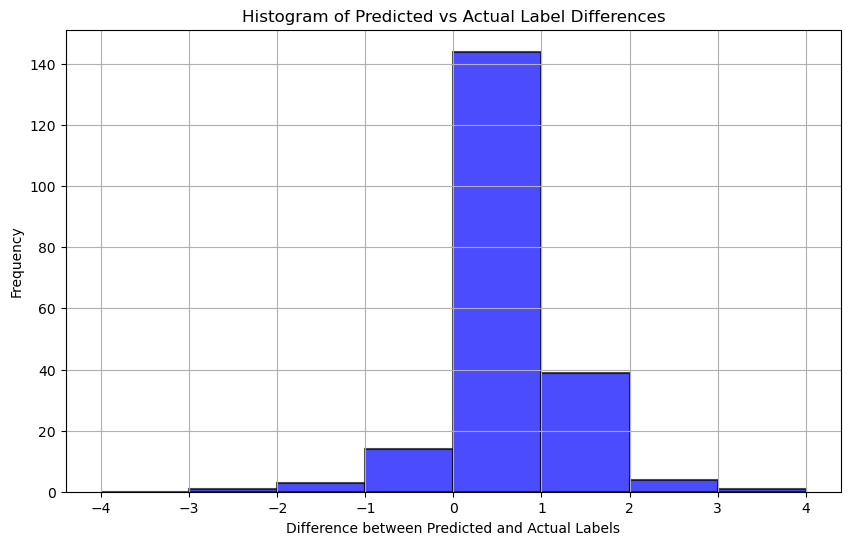

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions on the validation dataset
predictions = trainer.predict(tokenized_datasets['validation'])

# Extract predicted and actual labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
actual_labels = tokenized_datasets['validation']['labels']

# Calculate the differences between predicted and actual labels
differences = predicted_labels - actual_labels

# Plot the differences
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=range(-4, 5), alpha=0.7, color='blue', edgecolor='black', linewidth=1.5)
plt.xlabel('Difference between Predicted and Actual Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted vs Actual Label Differences')
plt.xticks(range(-4, 5))
plt.grid(True)
plt.show()